# The touchstone format
[Touchstone][touchstone] is a series of formats for saving scattering parameters and related data for network analyzer measurements. It is an ascii based format that can have several extensions associated with it. For a number of given number of ports it may have the file extension .snp where n is the number of ports. The most common extension is s2p, but other port numbers can exist and .ts can also represent a touchstone file of unknown port number.

From the app-note on touchstone:
>"Touchstone files are ASCII text files in which frequency dependent data appears line by line, one line per data point, in increasing order of frequency. Each frequency line consists of a frequency value and one or more pairs of values for the magnitude and phase of each S-parameter at that frequency. Values are separated by one or more spaces, tabs or commands. Comments are preceded by an exclamation mark (!). Comments can appear on separate lines, or after the data on any line or lines. Extra spaces are ignored." 



[touchstone]:http://cp.literature.agilent.com/litweb/pdf/genesys200801/sim/linear_sim/sparams/touchstone_file_format.htm

In [1]:
# First we import pyMez.Code.DataHandlers.TouchstoneModels
# to not import all of pyMez we can add the pyMez root folder to sys.path
import sys
import os
sys.path.append(os.path.join(os.getcwd(), '..','..','..'))

In [2]:
sys.path[-1]

'C:\\Users\\sandersa\\PyCharmProjects\\pyMez3\\Documentation\\Examples\\jupyter\\..\\..\\..'

In [3]:
# Now we can import this module with importing everything in pyMez
from Code.DataHandlers.TouchstoneModels import *
# Don't worry about the smithplot message, it is a reminder for later.

The module smithplot was not found,please put it on the python path


In [4]:
# Now there are 3 primary classes for handling Touchstone files, SP1V1 (version 1 s1p files), S2PV1 (version 1 s2p files)
# and SNP (version 1 files with any number of ports). You can open any snp file with SNP but it does not deal with certain 
# aspects of s2p files like having noise parameters.
# There files for test located in the directory TESTS_DIRECTORY
new_s2p=S2PV1(os.path.join(TESTS_DIRECTORY,"TwoPortTouchstoneTestFile.s2p"))

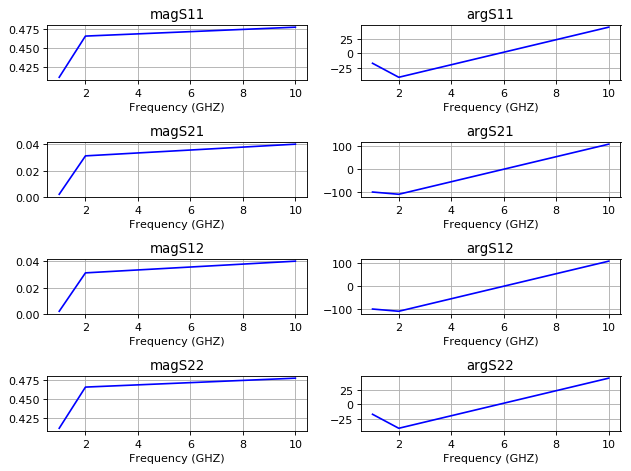

In [5]:
%matplotlib inline
# now we can visualize, change the frequency units, change the format of this s2p file
new_s2p.show();

In [6]:
# to see the string representation use print
print(new_s2p)

 # GHZ    S   RI   R   50.0
1  0.3926  -0.1211  -0.0003  -0.0021  -0.0003  -0.0021  0.3926  -0.1211!Inline Comment
2  0.3517  -0.3054  -0.0096  -0.0298  -0.0096  -0.0298  0.3517  -0.3054
10  0.3419  0.3336  -0.0134  0.0379  -0.0134  0.0379  0.3419  0.3336
! Noise parameters
1  2  -0.1211  -0.0003  0.4
2  2.5  -0.3054  -0.0096  0.45
3  3  -0.6916  -0.6933  0.5
4  3.5  -0.3756  0.4617  0.55
5  4  0.388  0.6848  0.6
6  4.5  0.0343  0.0383  0.65
7  5  0.6916  0.6933  0.7
8  5.5  0.5659  0.1  0.75
9  6  0.4145  0.0307  0.8
10  6.5  0.3336  0.0134  0.85


In [7]:
# we can change the units
new_s2p.change_frequency_units("HZ")
print(new_s2p)

 # Hz    S   RI   R   50.0
1e+09  0.3926  -0.1211  -0.0003  -0.0021  -0.0003  -0.0021  0.3926  -0.1211!Inline Comment
2e+09  0.3517  -0.3054  -0.0096  -0.0298  -0.0096  -0.0298  0.3517  -0.3054
1e+10  0.3419  0.3336  -0.0134  0.0379  -0.0134  0.0379  0.3419  0.3336
! Noise parameters
1e+09  2  -0.1211  -0.0003  0.4
2e+09  2.5  -0.3054  -0.0096  0.45
3e+09  3  -0.6916  -0.6933  0.5
4e+09  3.5  -0.3756  0.4617  0.55
5e+09  4  0.388  0.6848  0.6
6e+09  4.5  0.0343  0.0383  0.65
7e+09  5  0.6916  0.6933  0.7
8e+09  5.5  0.5659  0.1  0.75
9e+09  6  0.4145  0.0307  0.8
1e+10  6.5  0.3336  0.0134  0.85


In [8]:
# we can change the format from MA, RI, and DB note DB has a min feature to prevent errors when the parameter has zero absolute
# value
new_s2p.change_data_format('MA')
print(new_s2p)

 # Hz    S   MA   R   50.0
1e+09  0.4109  -17.14  0.002121  -98.13  0.002121  -98.13  0.4109  -17.14!Inline Comment
2e+09  0.4658  -40.97  0.03131  -107.9  0.03131  -107.9  0.4658  -40.97
1e+10  0.4777  44.3  0.0402  109.5  0.0402  109.5  0.4777  44.3
! Noise parameters
1e+09  2  -0.1211  -0.0003  0.4
2e+09  2.5  -0.3054  -0.0096  0.45
3e+09  3  -0.6916  -0.6933  0.5
4e+09  3.5  -0.3756  0.4617  0.55
5e+09  4  0.388  0.6848  0.6
6e+09  4.5  0.0343  0.0383  0.65
7e+09  5  0.6916  0.6933  0.7
8e+09  5.5  0.5659  0.1  0.75
9e+09  6  0.4145  0.0307  0.8
1e+10  6.5  0.3336  0.0134  0.85


In [9]:
# The sparameter data in the present format is saved in the data attribute
new_s2p.data

[[1000000000.0,
  0.4108527351740524,
  -17.14271563807323,
  0.0021213203435596424,
  -98.13010235415598,
  0.0021213203435596424,
  -98.13010235415598,
  0.4108527351740524,
  -17.14271563807323],
 [2000000000.0,
  0.46579185265523915,
  -40.969536672999205,
  0.03130814590485997,
  -107.85622325731426,
  0.03130814590485997,
  -107.85622325731426,
  0.46579185265523915,
  -40.969536672999205],
 [10000000000.0,
  0.47768668601919395,
  44.2960310291663,
  0.04019912934380545,
  109.47165937554458,
  0.04019912934380545,
  109.47165937554458,
  0.47768668601919395,
  44.2960310291663]]

In [10]:
# the complex data is saved in the sparameter_complex attribute
new_s2p.sparameter_complex

[[1000000000.0,
  (0.3926-0.1211j),
  (-0.0003-0.0021j),
  (-0.0003-0.0021j),
  (0.3926-0.1211j)],
 [2000000000.0,
  (0.3517-0.3054j),
  (-0.0096-0.0298j),
  (-0.0096-0.0298j),
  (0.3517-0.3054j)],
 [10000000000.0,
  (0.3419+0.3336j),
  (-0.0134+0.0379j),
  (-0.0134+0.0379j),
  (0.3419+0.3336j)]]

In [11]:
#save the file with 
new_s2p.save("new_s2p.s2p")
saved_s2p=S2PV1("new_s2p.s2p")

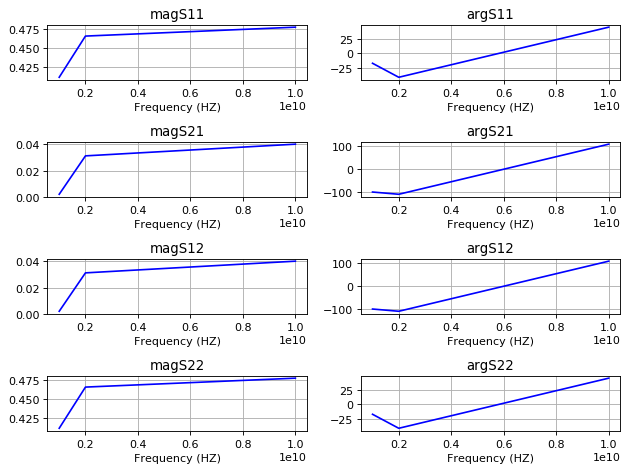

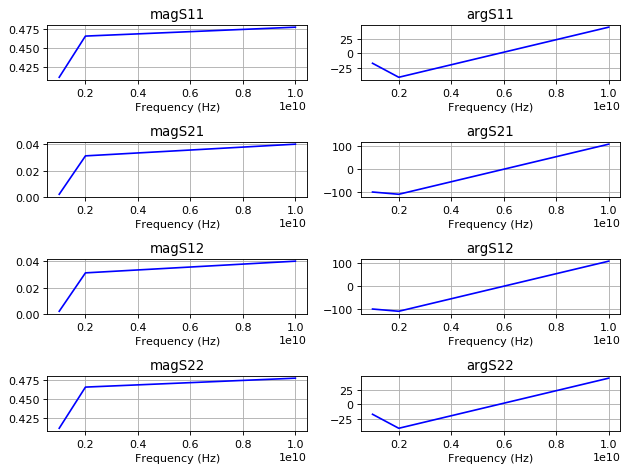

In [12]:
new_s2p.show();
saved_s2p.show();

In [13]:
# to retrieve a single column use new_s2p[column_name] or new_s2p.get_column(column_name)
print(new_s2p["magS11"])
print(new_s2p.get_column('Frequency'))
# the current column names are stored in the attribute column_names
print(new_s2p.column_names)

[0.4108527351740524, 0.46579185265523915, 0.47768668601919395]
[1000000000.0, 2000000000.0, 10000000000.0]
['Frequency', 'magS11', 'argS11', 'magS21', 'argS21', 'magS12', 'argS12', 'magS22', 'argS22']


In [14]:
# for any port of device we can use SNP, the port should be available in the file name 
new_s3p=SNP(os.path.join(TESTS_DIRECTORY,'B7_baseline_50ohm_OR2_10n0_4p0_REV2_EVB1_01new.s3p'))

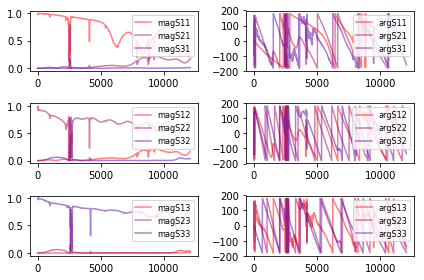

In [15]:
new_s3p.show();

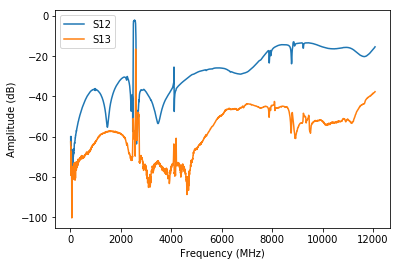

In [16]:
# we can plot a single component using the matplotlib library
import matplotlib.pyplot as plt
plt.plot(new_s3p["Frequency"],new_s3p['dbS12'],'-',label="S12")
plt.plot(new_s3p["Frequency"],new_s3p['dbS13'],'-',label="S13")
plt.xlabel("Frequency ({0})".format(new_s3p.frequency_units))
plt.ylabel("Amplitude (dB)")
plt.legend()
plt.show()

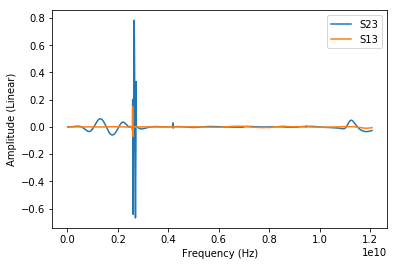

In [17]:

new_s3p.change_data_format('RI')
new_s3p.change_frequency_units('Hz')
plt.plot(new_s3p["Frequency"],new_s3p['imS23'],'-',label="S23")
plt.plot(new_s3p["Frequency"],new_s3p['imS13'],'-',label="S13")
plt.xlabel("Frequency ({0})".format(new_s3p.frequency_units))
plt.ylabel("Amplitude (Linear)")
plt.legend()
plt.show()

# GHZ   S   RI   R   50.0
1  0.9488  -0.2017
1.5  0.9077  -0.3125
2  0.8539  -0.4165
2.5  0.7884  -0.512
3  0.7124  -0.5978
3.5  0.6321  -0.6546
4  0.5479  -0.7013
4.5  0.4701  -0.738
5  0.3904  -0.7663
5.5  0.3302  -0.7778
6  0.2702  -0.7848
6.5  0.2041  -0.789
7  0.1389  -0.7878
7.5  0.0894  -0.7849
8  0.0408  -0.7789
8.5  0.0134  -0.7649
9.5  0.0654  -0.7471
9  0.1094  -0.7319
10  0.1518  -0.714
The attributes for the table as read in are
--------------------------------------------------------------------------------
The attribute data is [[1.0, 0.9488, -0.2017], [1.5, 0.9077, -0.3125], [2.0, 0.8539, -0.4165], [2.5, 0.7884, -0.512], [3.0, 0.7124, -0.5978], [3.5, 0.6321, -0.6546], [4.0, 0.5479, -0.7013], [4.5, 0.4701, -0.738], [5.0, 0.3904, -0.7663], [5.5, 0.3302, -0.7778], [6.0, 0.2702, -0.7848], [6.5, 0.2041, -0.789], [7.0, 0.1389, -0.7878], [7.5, 0.0894, -0.7849], [8.0, 0.0408, -0.7789], [8.5, 0.0134, -0.7649], [9.5, 0.0654, -0.7471], [9.0, 0.1094, -0.7319], [10.0, 0.1518, -0.714

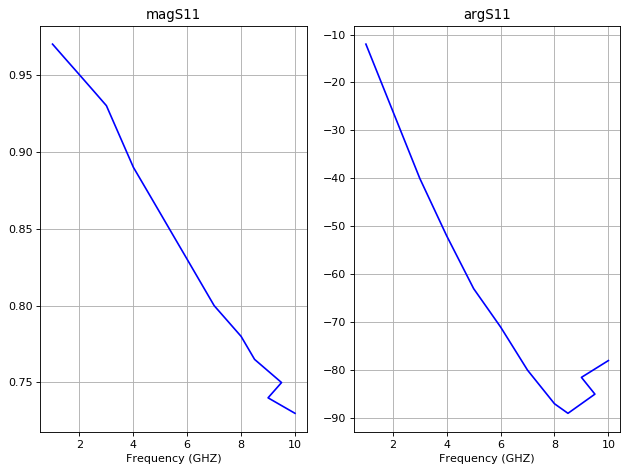

In [18]:
# In addtion every module has a series of tests, to make sure the standard case works 
test_S1PV1()